# Imports

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

# Global Variables

In [2]:
save_dir = "/content/drive/MyDrive/AI in healthcare and Wearables/Results/" # Mica
tracker_dir = save_dir + "trackers/"
bar_dir = save_dir + "tracker_bar_plots/"
hist_plot_dir = save_dir + "hist_plots/"

model_archetypes = ["dense", "conv"]
model_types_df = ["naive", "initial_target", "transfer_target", "initial_comb", "transfer_comb"]
model_types_plot = ["naive", "target", "comb"]
test_sets = ["target", "comb"]
metrics = ["precision", "recall", "f1", "accuracy", "loss"]
hist_metrics = ["accuracy", "val_accuracy", "loss", "val_loss"]
hist_metrics_title = ["accuracy", "val accuracy", "loss", "val loss"]

colors = ["magenta", 
            "steel blue", 
            "red", 
            "light navy blue", 
            "pumpkin", 
            "sky blue", 
            "goldenrod", 
            "green", 
            "light purple", 
            "kelly green",
            "faded red",  
            "teal", 
            "lavender", 
            "turquoise", 
            "azure",
            "light orange",  
            "cerulean", 
            "rose",
            ]
colors = ["xkcd:%s"%(x) for x in colors]
labels = None

# Load Data

In [3]:
# if not os.path.exists("drive/"):
#     drive.mount('/content/drive')

## Trackers

In [4]:
trackers = {}
for (r, d, files) in os.walk(tracker_dir):
    for f in files:
        trackers.update({f.split(".")[0]: pd.read_csv(tracker_dir + f)})

## Histories

In [5]:
# Load
h = {}
for (r, d, files) in os.walk(save_dir + "histories/"):
    for f in files:
        fn = f.split(".")[0]
        fn = fn.split("_")
        exp_name = "_".join(fn[:-1])
        a_type = fn[-1]
        if exp_name not in h:
            h.update({exp_name: {a_type: None}})
        if a_type not in h[exp_name]:
            h[exp_name].update({a_type: None})

        with open(save_dir + "histories/" + f, "rb") as file:
            h[exp_name][a_type] = pickle.load(file)
labels = list(h.keys())

In [6]:
labels = sorted(list(h.keys()))
labels

['001_baseline',
 '002_drop_learning_rate',
 '003_drop_layers',
 '004_drop_layers_drop_learning_rate',
 '005_reduce_data',
 '006_reduce_data_and_drop_learning_rate',
 '007_reduce_data_and_drop_layers',
 '008_reduce_data_and_drop_learning_rate_and_layers',
 '009_balance_classes_seperate_sets',
 '010_balance_classes_combine_sets',
 '011_balance_classes_target',
 '012_balance_classes_source',
 '013_one_shot',
 '014_two_shot',
 '015_five_shot',
 '016_ten_shot',
 '017_fifteen_shot',
 '018_twenty_shot']

In [7]:
keys = [x for x in sorted(list(trackers.keys())) if "dual" in x]
for t in keys:
    print(t)
    print(trackers[t])
    break

001_baseline_dual
    model_archetype       model_type  run test_level      loss  accuracy  \
0             dense     initial_comb   -1       comb  0.165994  0.952621   
1             dense     initial_comb   -1     source  0.180186  0.950233   
2             dense     initial_comb   -1     target  0.036152  0.974468   
3             dense     initial_comb    0       comb  0.199073  0.937107   
4             dense     initial_comb    0     source  0.217556  0.932558   
..              ...              ...  ...        ...       ...       ...   
175            conv  transfer_target    3     source  0.204959  0.941860   
176            conv  transfer_target    3     target  0.049273  0.978723   
177            conv  transfer_target    4       comb  0.173202  0.941300   
178            conv  transfer_target    4     source  0.187349  0.937209   
179            conv  transfer_target    4     target  0.043769  0.978723   

     precision    recall        f1       auc  \
0     0.941317  0.938

# Compare Scores

## Function

In [ ]:
# rows - model type
# cols - socre

def plot_compare_scores(trackers, archetype, test, title="", save=False, save_dir="", save_name=""):

    # Build vals
    vals = {}
    for mt in model_types_plot:
        vals.update({mt: {}})
        for m in metrics:
            vals[mt].update({m: {}})

    # Iterate over trackers
    x = []
    labels = sorted(list(trackers.keys()))
    for t in labels:
        if "dual" in t and "016" not in t:
            exp = "_".join(t.split("_")[:-1])
            x.append(exp.split("_")[0])
            for mt in model_types_plot:
                for m in metrics:
                    vals[mt][m].update({exp :None})

            # Get values
            for i, row in trackers[t].iterrows():
                if "initial" not in row["model_type"]:
                    mt = row["model_type"].split("_")[-1]
                    for m in metrics:
                        vals[mt][m][exp] = row[m]

    # Iterate to build plots
    w = 0.8
    c = 0
    x_ticks = np.arange(len(x))
    fig, ax = plt.subplots(5, 3, figsize=(15, 15))
    for i, m in enumerate(metrics):
        for j, mt in enumerate(model_types_plot):

            # Get values
            y = []
            for exp in vals[mt][m]:
                y.append(vals[mt][m][exp])

            # Plot
            ax[i][j].bar(x_ticks, y, width=w, label=x, color=colors)

            # Subplot labels
            ax[i][j].set_xticks(np.arange(len(x)))
            ax[i][j].set_xticklabels(x, rotation=90)
            ax[i][j].set_xlabel("Experiment")
            ax[i][j].set_ylabel("Score")
            ax[i][j].set_title(" ".join([archetype.capitalize(), test.capitalize(), mt.capitalize(), m.capitalize()]))

    patches = []
    for k, l in enumerate(x):
        patches.append(mpatches.Patch(color=colors[k], label=" ".join(["exp", l])))
    fig.legend(handles=patches, loc="upper right")
    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(right=0.9, top=0.95)
    if save:
        plt.savefig(save_dir + save_name)
    plt.show()

# plot_compare_scores(trackers, "dense", "comb", save=False)

## Plot

In [ ]:
for a in ["dense", "comb"]:
    for t in ["target", "comb"]:
        plot_compare_scores(trackers, a, t, title=" ".join([a.capitalize(), t.capitalize(), "Compare"]), save=True, save_dir=bar_dir, save_name="000_%s_%s_compare.png"%(a, t))

# Compare Scores Clustered

## Function

In [16]:
def plot_compare_scores_clustered(trackers, a_type, title="", save=False, save_dir="", save_name=""):
    colors = ["xkcd:light blue", "xkcd:azure", "xkcd:bright blue"]

    # Build vals
    vals = {}
    for m in metrics:
        vals.update({m: {}})
        for t in test_sets:
            vals[m].update({t: {}})
            for mt in model_types_plot:
                vals[m][t].update({mt: []})

    # Iterate over trackers
    labels = sorted(list(trackers.keys()))
    for k in labels:
        if "dual" in k:
            exp = "_".join(k.split("_")[:-1])

            # Get values
            for t in test_sets:
                df = trackers[k].loc[(trackers[k]["run"] == -1) & 
                                     (trackers[k]["model_archetype"] == a_type) & 
                                     (trackers[k]["test_level"] == t)
                                    ]
                for i, row in df.iterrows():
                    if "initial" not in row["model_type"]:
                        mt = row["model_type"].split("_")[-1]
                        for m in metrics:
                            vals[m][t][mt].append(row[m])

    # Iterate to build plots

    n_bars = len(model_types_plot)
    w = 0.8 / n_bars
    x = [x.split("_")[0] for x in labels]
    x = sorted(list(set(x)))
    fig, ax = plt.subplots(4, 2, figsize=(15, 20))
    x_ticks = np.arange(len(x))
    for k, mt in enumerate(model_types_plot):
        for i, m in enumerate(metrics):
            if m == "loss": 
                continue
            for j, t in enumerate(test_sets):
                
                # Plot
                offset = (k - n_bars / 2) * w + w / 2
                ax[i][j].bar(x_ticks + offset, vals[m][t][mt], width=w, label=mt, color=colors[k])

                # Subplot labels
                ax[i][j].set_xticks(x_ticks)
                ax[i][j].set_xticklabels(x, rotation=90)
                ax[i][j].set_ylim((0, 1))
                ax[i][j].set_xlabel("Experiment")
                ax[i][j].set_ylabel("Score")
                ax[i][j].set_title(" ".join([a_type.capitalize(), t.capitalize(), m.capitalize()]))

    patches = []
    for k, mt in enumerate(model_types_plot):
        patches.append(mpatches.Patch(color=colors[k], label=" ".join([x.capitalize() for x in mt.split("_")])))
    fig.legend(handles=patches, loc="upper right")
    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(right=0.9, top=0.95)
    if save:
        plt.savefig(save_dir + save_name)
    plt.show()

# plot_compare_scores_clustered(trackers, "dense", title="test", save=False)

## Plot

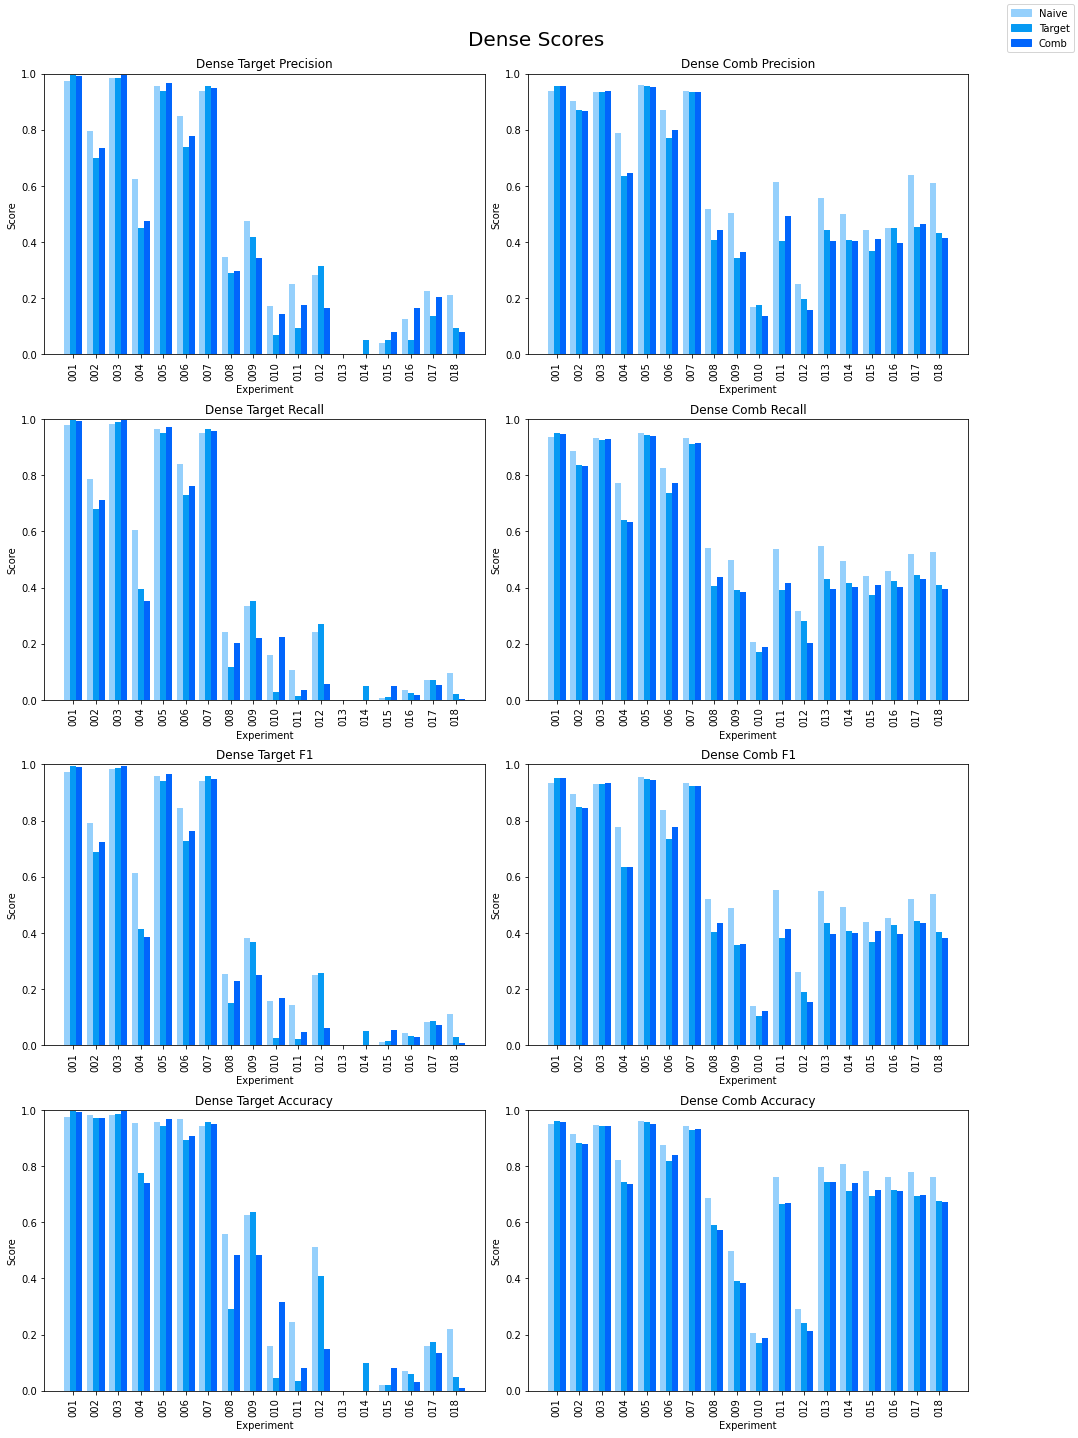

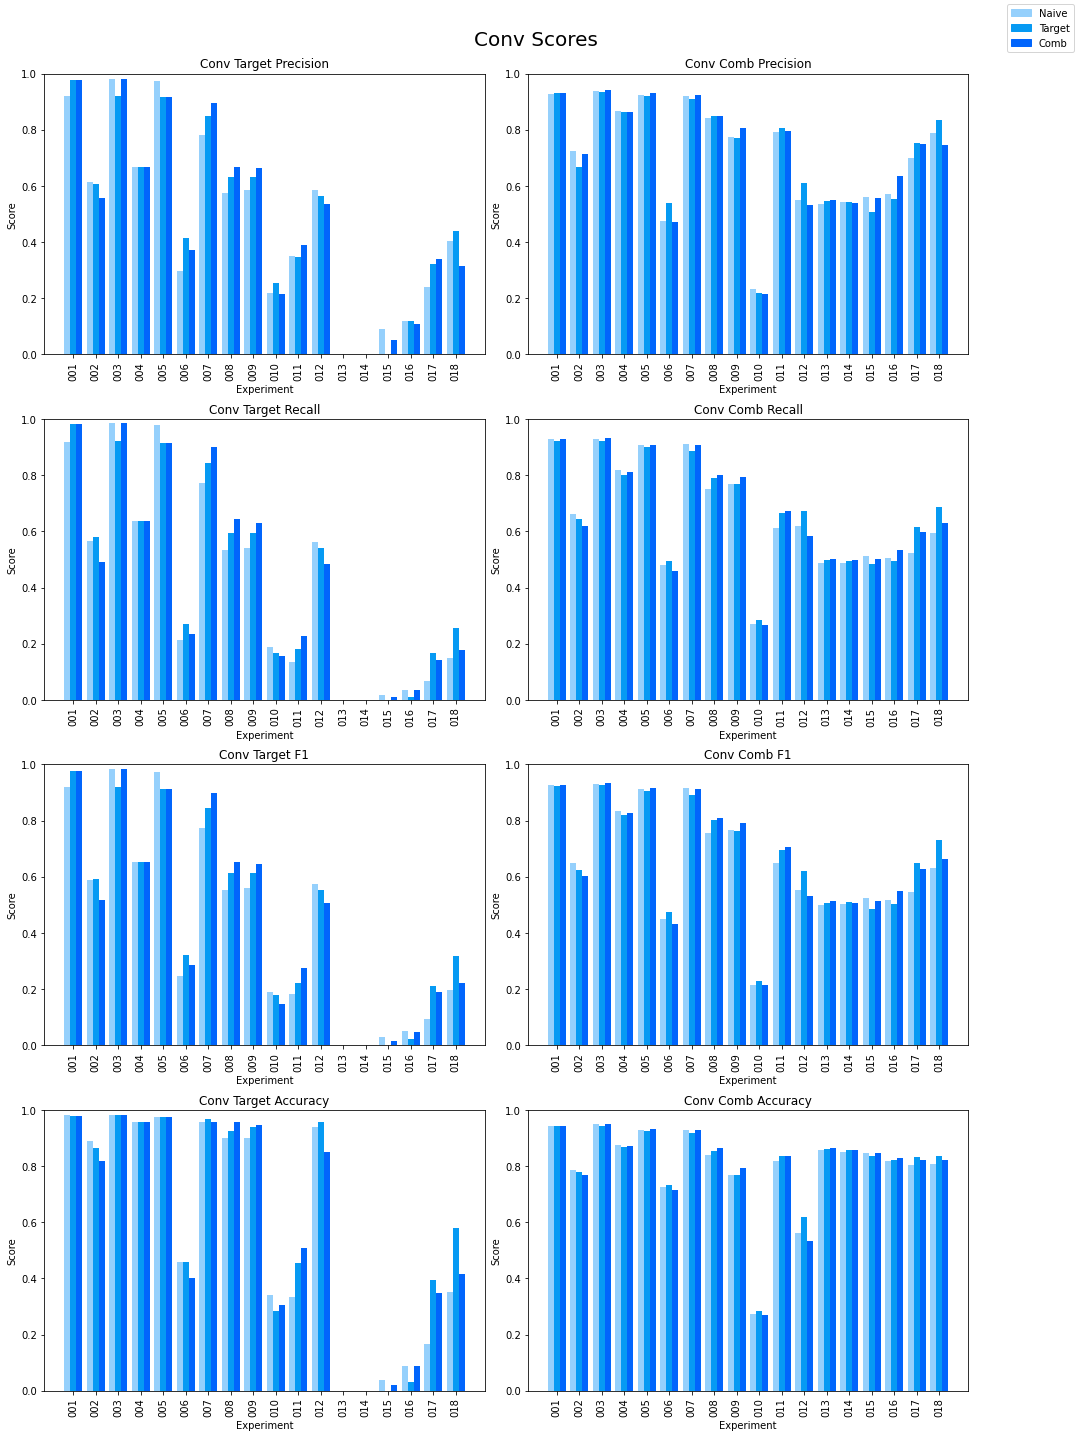

In [17]:
for a in model_archetypes:
    plot_compare_scores_clustered(trackers, a, title="%s Scores"%(a.capitalize()), save=True, save_dir=bar_dir, save_name="000_%s_scores.png"%(a))

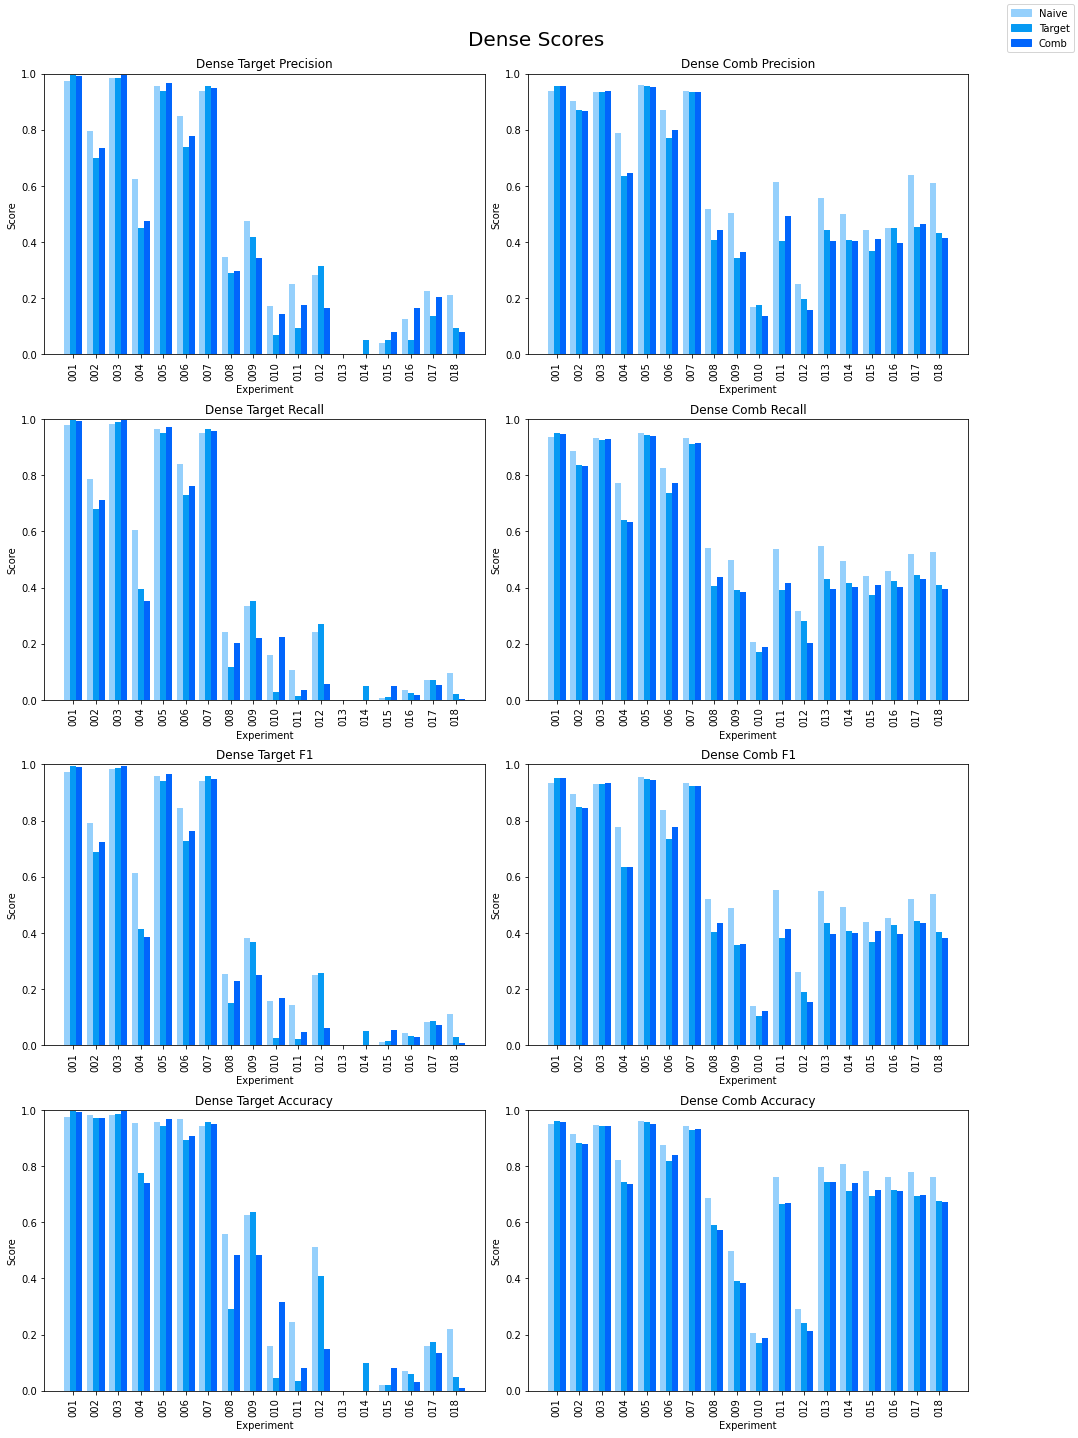

In [18]:
plot_compare_scores_clustered(trackers, "dense", title="Dense Scores", save=False)

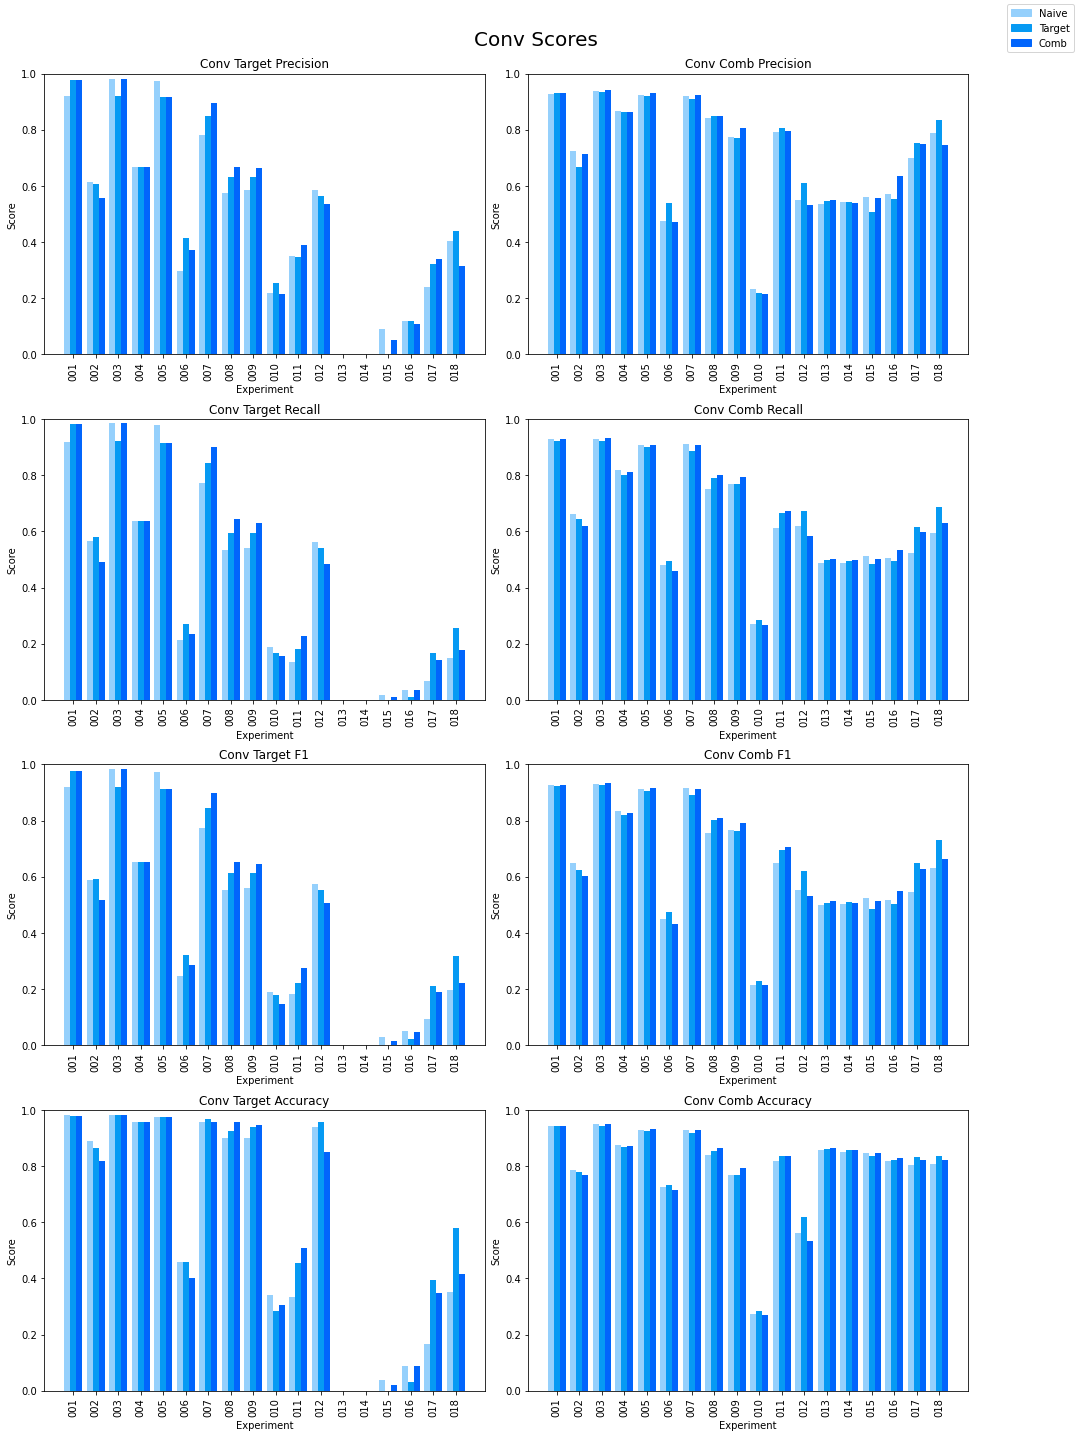

In [19]:
plot_compare_scores_clustered(trackers, "conv", title="Conv Scores", save=False)

# Scores Table

## Function

In [ ]:
def scores_table(trackers, save=False, save_dir="", save_name=""):

    # Build vals
    vals = {}
    for m in metrics:
        vals.update({m: {}})
        for t in test_sets:
            vals[m].update({t: {}})
            for mt in model_types_plot:
                vals[m][t].update({mt: []})

    # Build indexer
    # tuples = []
    # for l in labels:
    #     for a in model_archetypes:
    #         for t in test_sets:
    #             tuples.append((l, a, t))
    

    # Iterate over trackers
    df_master = []
    labels = sorted(list(trackers.keys()))
    x = [x.split("_")[0] for x in labels]
    x = sorted(list(set(x)))
    x = set()
    for k in labels:
        if "dual" in k:
            
            df = trackers[k].loc[trackers[k]["run"] == -1]
            df = df.loc[(df["model_type"] == "naive") | 
                        (df["model_type"] == "transfer_target") | 
                        (df["model_type"] == "transfer_comb")
                        ]
            df = df[["exp_name", "model_archetype", "model_type", "test_level", "loss", "precision", "recall", "f1", "accuracy"]]
            df_master.append(df)
    df_master = pd.concat(df_master)
    if save:
        df_master.to_csv(save_dir + save_name, index=False)

    return df_master

scores_table(trackers, save=True, save_dir="", save_name="test.csv")

,exp_name,model_archetype,model_type,test_level,loss,precision,recall,f1,accuracy
36,001_baseline,dense,naive,comb,0.169852,0.937693,0.934395,0.934835,0.949686
37,001_baseline,dense,naive,source,0.183534,0.885631,0.876070,0.879612,0.946977
38,001_baseline,dense,naive,target,0.044681,0.972294,0.977778,0.974132,0.974468
54,001_baseline,dense,transfer_comb,comb,0.177544,0.955157,0.946869,0.950562,0.958491
55,001_baseline,dense,transfer_comb,source,0.194758,0.937498,0.924007,0.930169,0.954884
...,...,...,...,...,...,...,...,...,...
145,018_twenty_shot,conv,transfer_comb,source,0.378578,0.820649,0.730569,0.750889,0.859535
146,018_twenty_shot,conv,transfer_comb,target,1.731148,0.314762,0.176000,0.221503,0.415000
162,018_twenty_shot,conv,transfer_target,comb,0.476894,0.833410,0.686376,0.731076,0.834468
163,018_twenty_shot,conv,transfer_target,source,0.384083,0.806067,0.722064,0.743338,0.854884


## View

# Compare Histories By Score

## Get Values

In [ ]:
# Iterate to get values
vals = {}
n_runs = 5
for exp_name in h:
    if exp_name not in vals:
        vals.update({exp_name: {}})
    for a_type in h[exp_name]:
        if a_type not in vals[exp_name]:
            vals[exp_name].update({a_type: {}})
        for m_type in model_types_df:
            mt = m_type.split("_")[-1]
            if mt not in vals[exp_name][a_type]:
                vals[exp_name][a_type].update({mt: {}})

            # Get averages
            l = len(h[exp_name][a_type][m_type][0].history["loss"])
            avgs = {"accuracy": np.zeros(l).tolist(), 
                    "val_accuracy": np.zeros(l).tolist(),
                    "loss": np.zeros(l).tolist(),
                    "val_loss": np.zeros(l).tolist(),
                    }
            for m in avgs:
                for run in h[exp_name][a_type][m_type]:
                    avgs[m] = [sum(x) for x in zip(avgs[m], h[exp_name][a_type][m_type][run].history[m])]
                avgs[m] = [x/n_runs for x in avgs[m]]
            
                # Combine initial and transfer histories
                if m not in vals[exp_name][a_type][mt]:
                    vals[exp_name][a_type][mt].update({m: None})
                if vals[exp_name][a_type][mt][m] is None:
                    vals[exp_name][a_type][mt][m] = avgs[m]
                else:
                    vals[exp_name][a_type][mt][m] += avgs[m]

## Function

In [ ]:
def plot_hists(vals, a_type, labels, title, save=False, save_dir="", save_name=""):
    # Iterate to plot ==============================================================
    n_rows = 4
    n_cols = 3
    epochs = 10
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 20))
    for j, mt in enumerate(model_types_plot):
        for i, m in enumerate(hist_metrics):
            for k, exp_name in enumerate(labels):
                
                # Plot values
                ax[i][j].plot(vals[exp_name][a_type][mt][m], color=colors[k])

                # Plot labels
                ax[i][j].set_xticks(np.arange(int(epochs*2)))
                ax[i][j].set_xlabel("Epoch")
                ax[i][j].set_ylabel("Score")
                ax[i][j].set_title(" ".join([a_type.capitalize(), mt.capitalize(), hist_metrics_title[i].capitalize()]))

    # Plot limits ==============================================================

    # Get values ---------------------------------------------------------------
    loss = [None, None]
    for i in range(2, n_rows):
        for j in range(n_cols):

            # Loss min
            if loss[0] is None:
                loss[0] = ax[i][j].get_ylim()[0]
            elif loss[0] > ax[i][j].get_ylim()[0]:
                loss[0] = ax[i][j].get_ylim()[0]

            # Loss max
            if loss[1] is None:
                loss[1] = ax[i][j].get_ylim()[1]
            elif loss[1] < ax[i][j].get_ylim()[1]:
                loss[1] = ax[i][j].get_ylim()[1]
                
    # Set values ---------------------------------------------------------------
    for i in range(int(n_rows/2)):
        for j in range(n_cols):
            ax[i][j].set_ylim((0, 1))
            ax[i+2][j].set_ylim(loss)
    plt.setp(ax, xlim=(0, epochs*2-1))

    # Plot =====================================================================
    patches = []
    for k, l in enumerate(labels):
        patches.append(mpatches.Patch(color=colors[k], label=" ".join(["exp", l.split("_")[0]])))
    fig.legend(handles=patches, loc="upper right")
    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    fig.subplots_adjust(right=0.9, top=0.95)
    if save:
        plt.savefig(save_dir + save_name)
    plt.plot()

# plot_hists(vals, "conv", labels, "Test", save=False)

In [ ]:
# for k in labels:
#     print(k)

## Learning Rate

In [ ]:
# Learning Rate
keys = labels[:8]
for a_type in model_archetypes:
    name = a_type.capitalize() + " Learning Rate Comparison"
    s_name = "000_%s.png"%("_".join(name.split(" ")))
    plot_hists(vals, a_type, keys, name, save=True, save_dir=hist_plot_dir, save_name=s_name.lower())

## Class Balancing

In [ ]:
keys = [labels[0]] + labels[8:12]
for a_type in model_archetypes:
    name = a_type.capitalize() + " Class Balancing Comparison"
    s_name = "000_%s.png"%("_".join(name.split(" ")))
    plot_hists(vals, a_type, keys, name, save=True, save_dir=hist_plot_dir, save_name=s_name.lower())

## Few Shot

In [ ]:
keys = [labels[0]] + labels[12:18]
for a_type in model_archetypes:
    name = a_type.capitalize() + " Few-Shot Learning Comparison"
    s_name = "000_%s.png"%("_".join(name.split(" ")))
    plot_hists(vals, a_type, keys, name, save=True, save_dir=hist_plot_dir, save_name=s_name.lower())

# Compare Histories by Source/Target

## Function

In [ ]:
# Rows: acc val_acc, loss, val_loss
# cols: exp1, exp2, exp3 ...

def plot_comp_hists(vals, a_type, labels, title, save=False, save_dir="", save_name=""):
    # Iterate to plot ==============================================================
    n_rows = len(labels)
    n_cols = 4
    epochs = 10
    height = int(n_rows * 3.3)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, height))
    for j, mt in enumerate(model_types_plot):
        for i, m in enumerate(hist_metrics):
            for k, exp_name in enumerate(labels):
                
                # Plot values
                ax[k][i].plot(vals[exp_name][a_type][mt][m], color=colors[j])

                # Plot labels
                ax[k][i].set_xticks(np.arange(int(epochs*2)))
                ax[k][i].set_xlabel("Epoch")
                ax[k][i].set_ylabel("Score")
                ax[k][i].set_title(" ".join([a_type.capitalize(), hist_metrics_title[i].capitalize(), exp_name.split("_")[0].capitalize()]))

    # Plot limits ==============================================================

    # Get values ---------------------------------------------------------------
    loss = [None, None]
    for i in range(n_rows):
        for j in range(2, 4):

            # Loss min
            if loss[0] is None:
                loss[0] = ax[i][j].get_ylim()[0]
            elif loss[0] > ax[i][j].get_ylim()[0]:
                loss[0] = ax[i][j].get_ylim()[0]

            # Loss max
            if loss[1] is None:
                loss[1] = ax[i][j].get_ylim()[1]
            elif loss[1] < ax[i][j].get_ylim()[1]:
                loss[1] = ax[i][j].get_ylim()[1]
                
    # Set values ---------------------------------------------------------------
    for i in range(n_rows):
        for j in range(int(n_cols/2)):
            ax[i][j].set_ylim((0, 1))
            ax[i][j+2].set_ylim(loss)
    plt.setp(ax, xlim=(0, epochs*2-1))

    # Plot =====================================================================
    patches = []
    for k, l in enumerate(model_types_plot):
        patches.append(mpatches.Patch(color=colors[k], label=l))
    fig.legend(handles=patches, loc="upper right")
    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    fig.subplots_adjust(right=0.9, top=0.95)
    if save:
        plt.savefig(save_dir + save_name)
    plt.plot()

# plot_comp_hists(vals, "dense", labels, "Test", save=False)

## Learning Rate

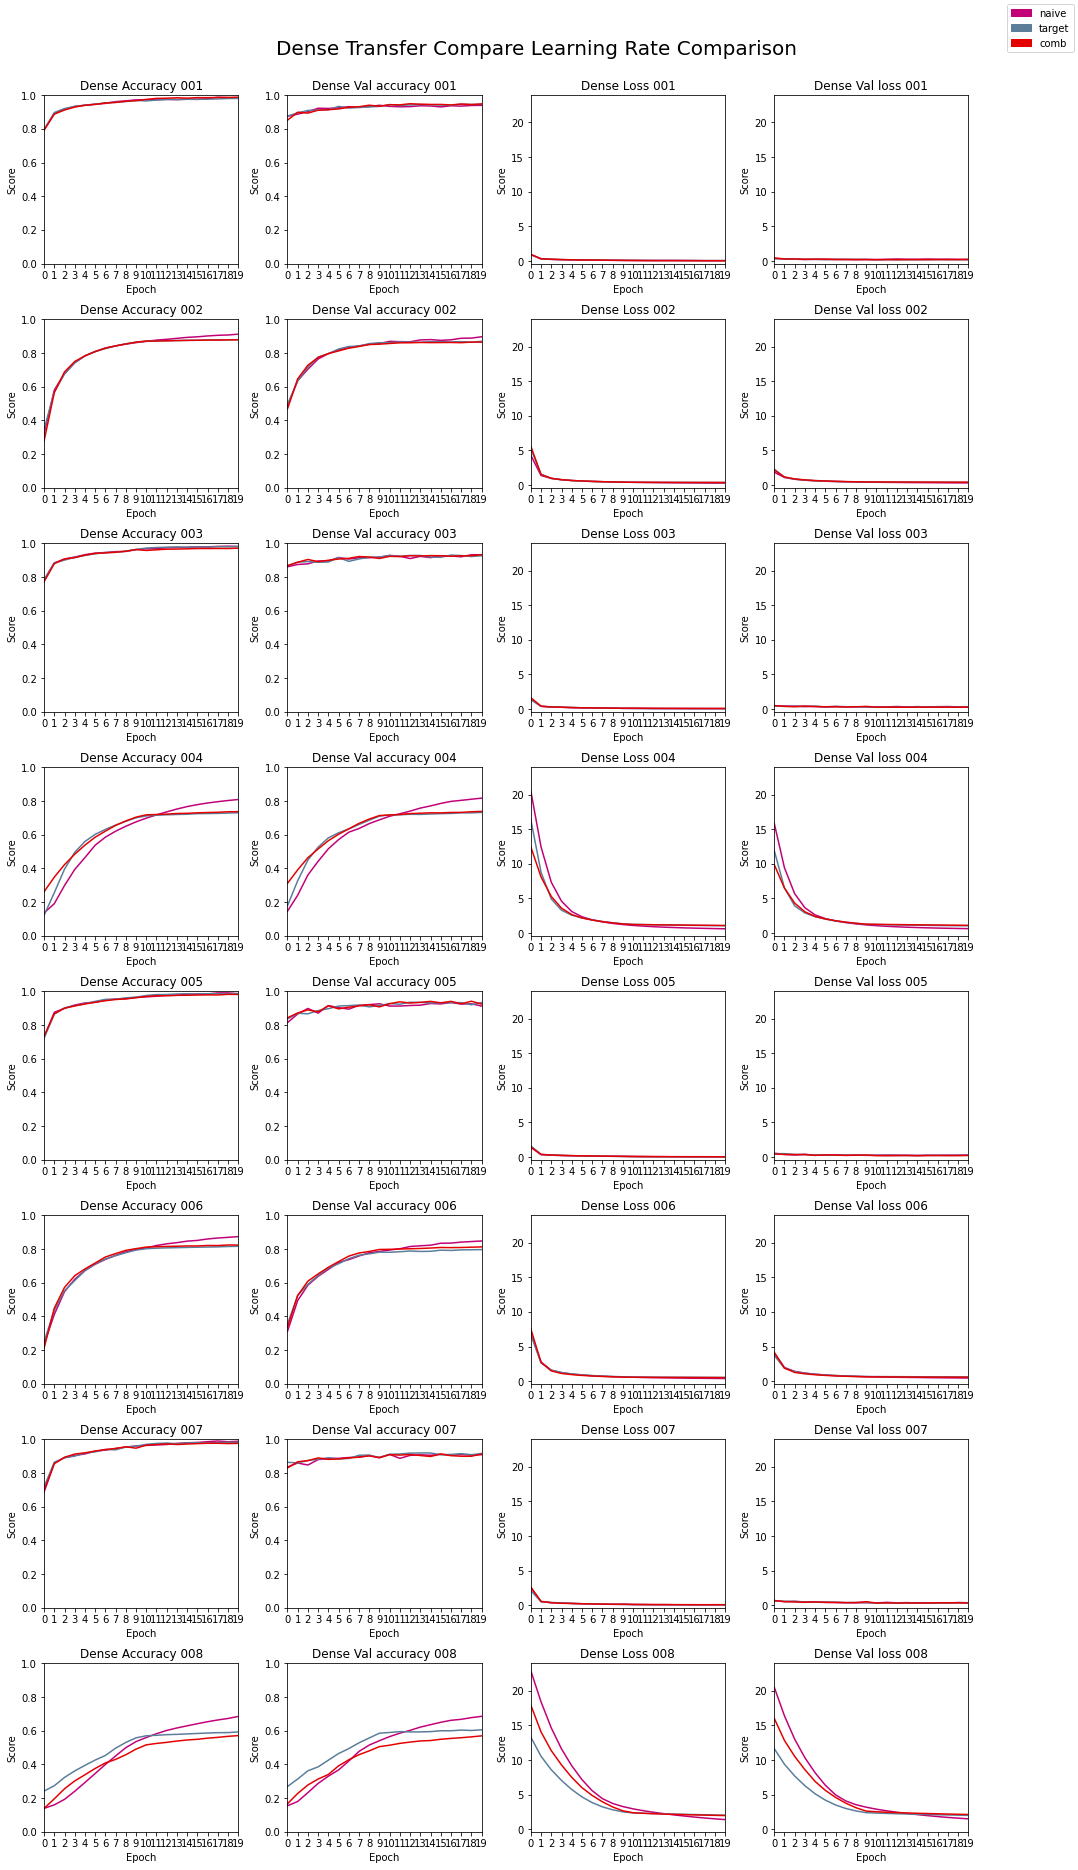

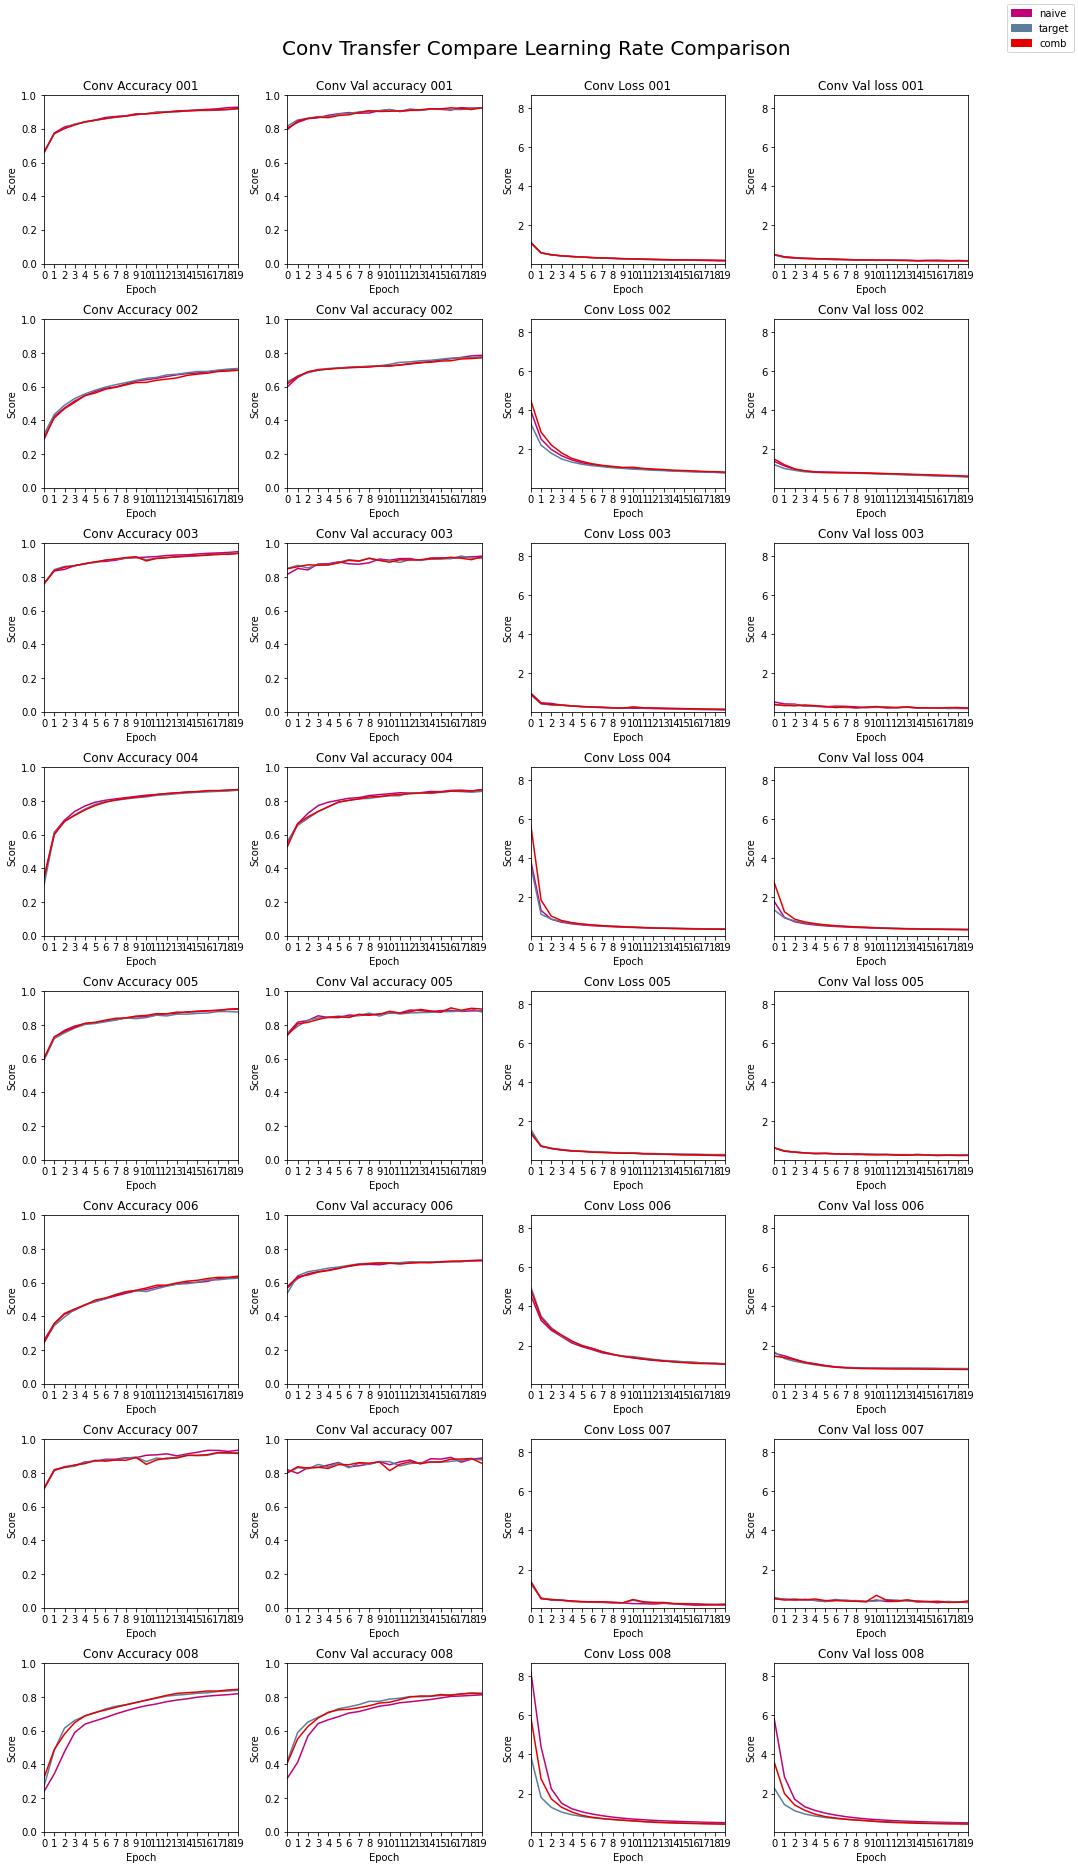

In [ ]:
# Learning Rate
keys = labels[:8]
for a_type in model_archetypes:
    name = a_type.capitalize() + " Transfer Compare Learning Rate Comparison"
    s_name = "000_%s.png"%("_".join(name.split(" ")))
    plot_comp_hists(vals, a_type, keys, name, save=True, save_dir=hist_plot_dir, save_name=s_name.lower())

## Class Balancing

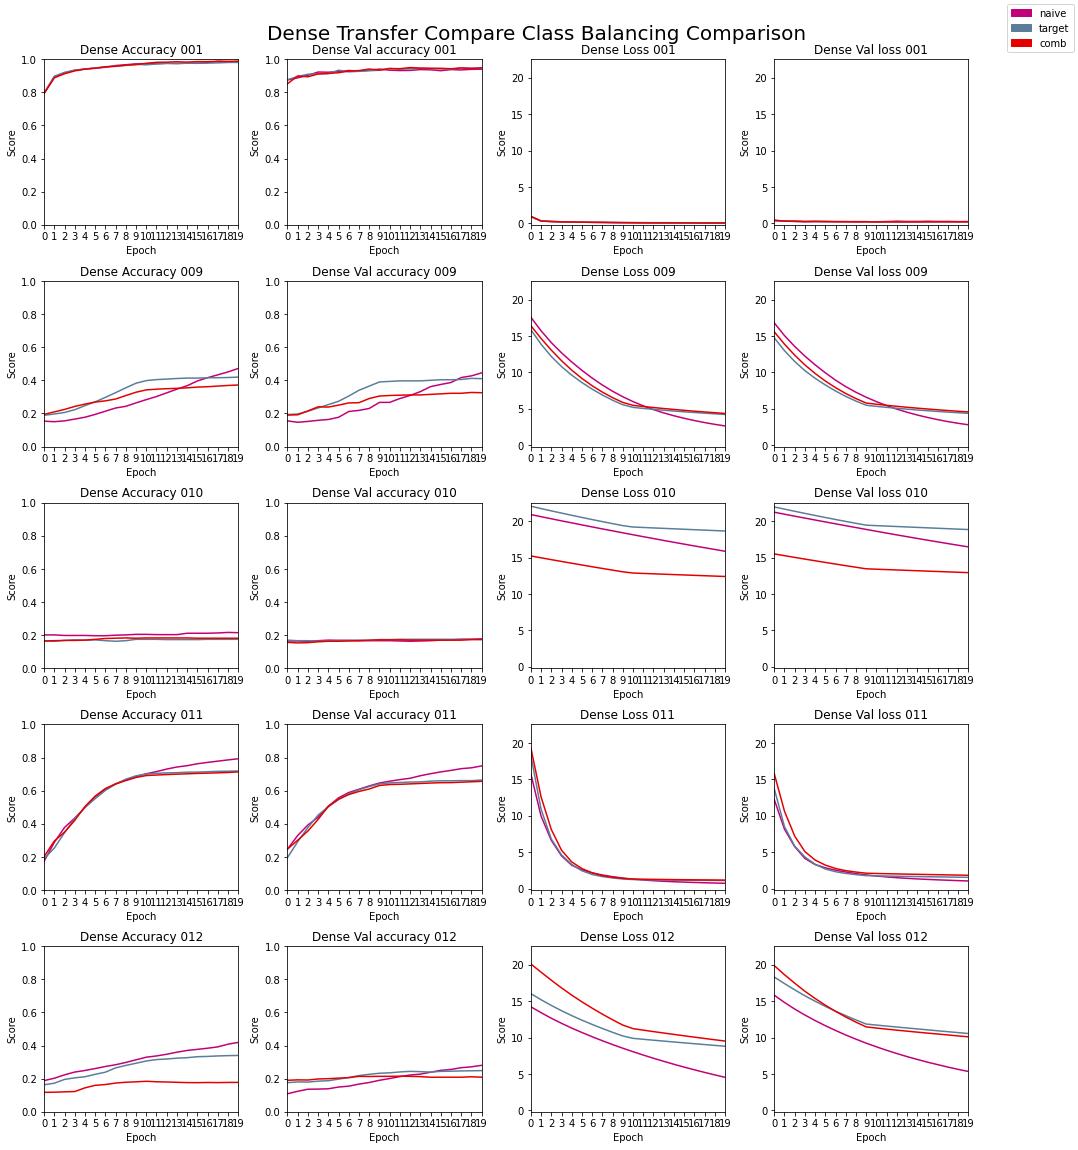

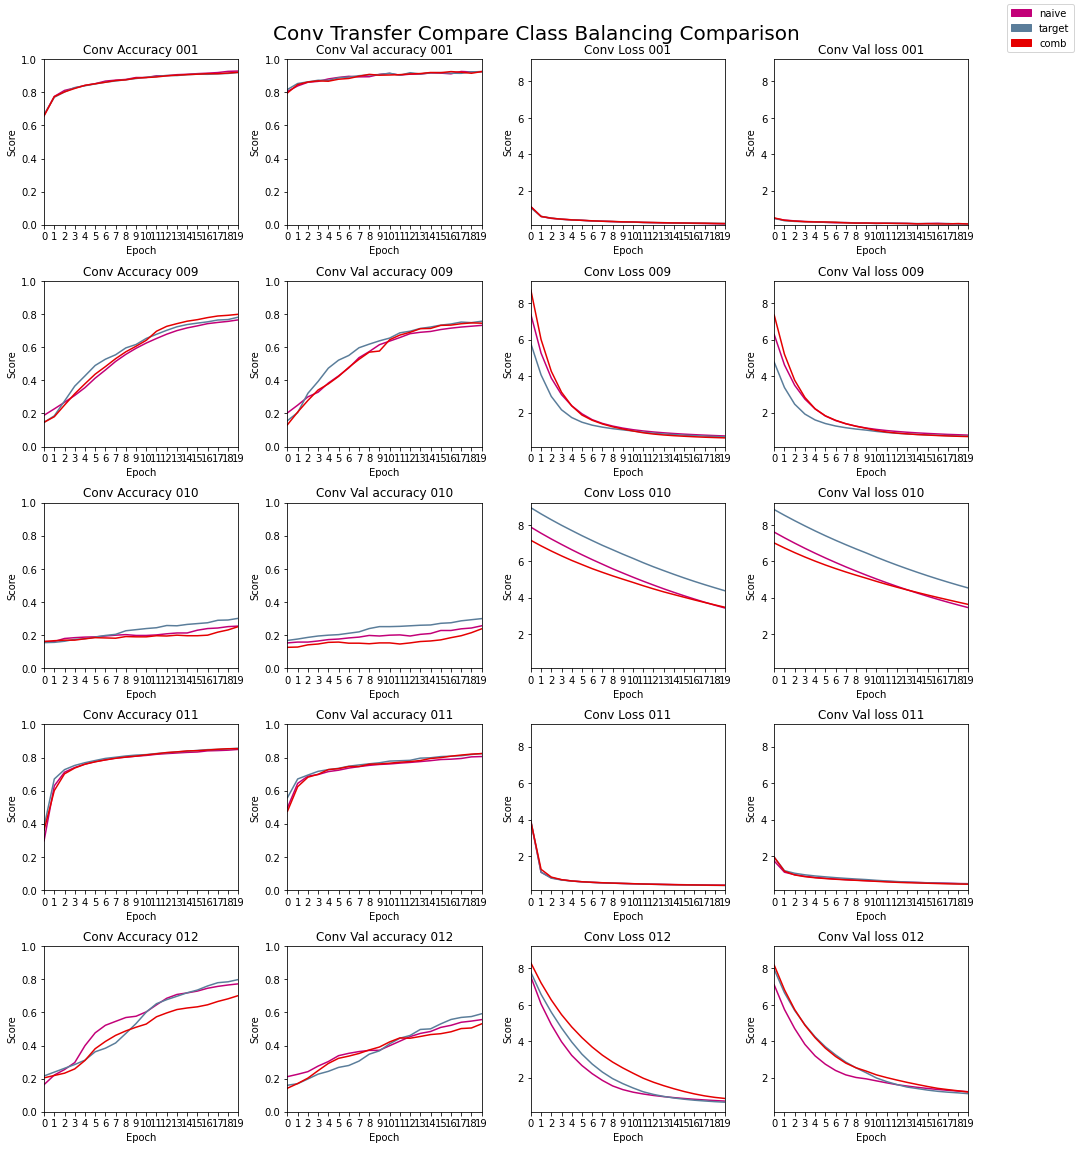

In [ ]:
keys = [labels[0]] + labels[8:12]
for a_type in model_archetypes:
    name = a_type.capitalize() + " Transfer Compare Class Balancing Comparison"
    s_name = "000_%s.png"%("_".join(name.split(" ")))
    plot_comp_hists(vals, a_type, keys, name, save=True, save_dir=hist_plot_dir, save_name=s_name.lower())

## Few Shot

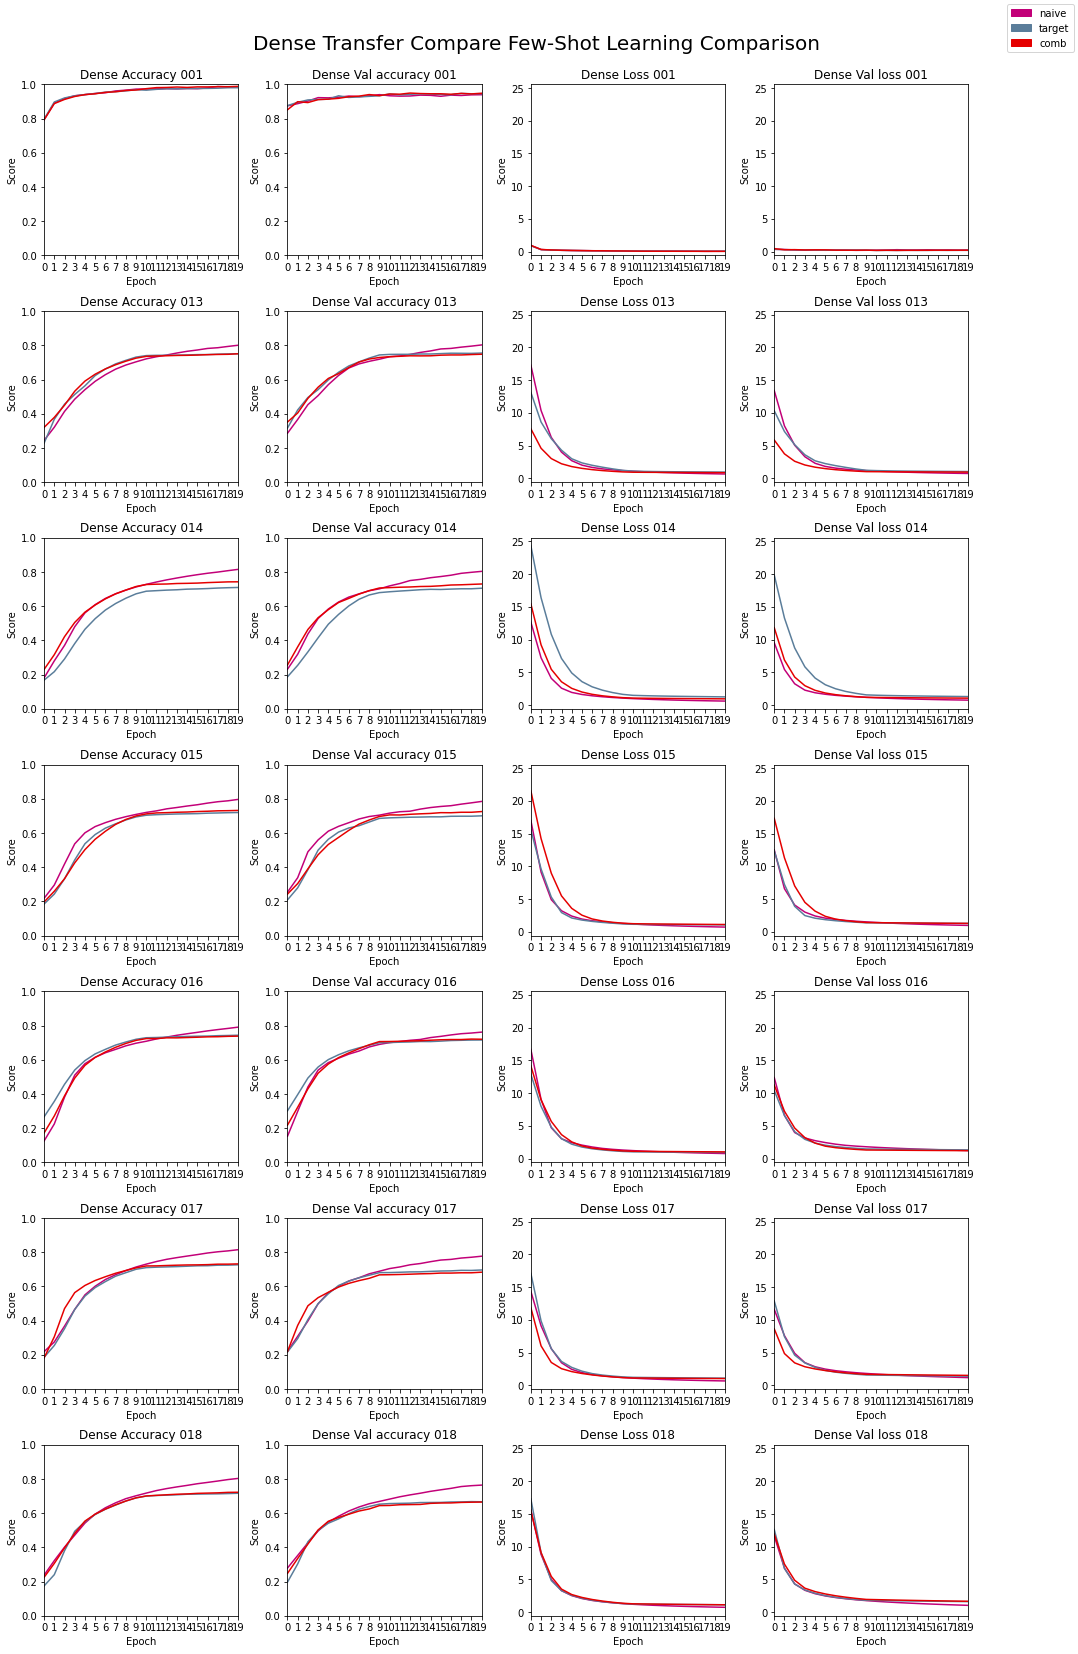

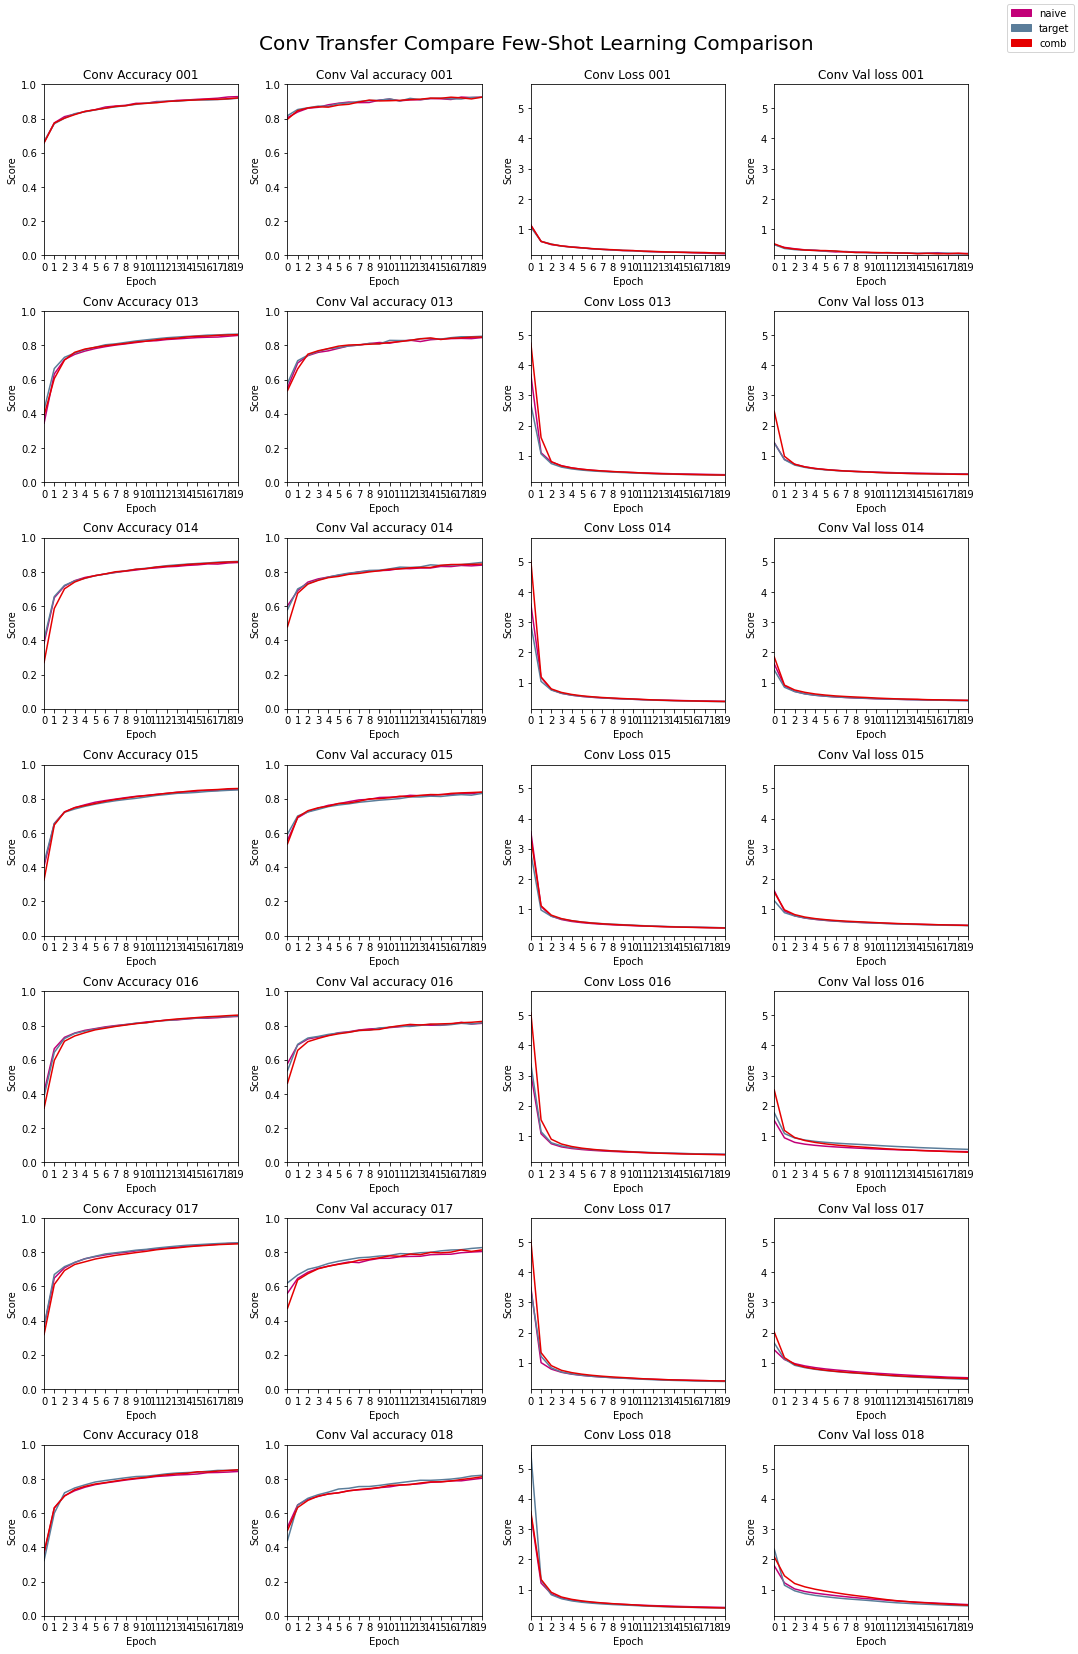

In [ ]:
keys = [labels[0]] + labels[12:18]
for a_type in model_archetypes:
    name = a_type.capitalize() + " Transfer Compare Few-Shot Learning Comparison"
    s_name = "000_%s.png"%("_".join(name.split(" ")))
    plot_comp_hists(vals, a_type, keys, name, save=True, save_dir=hist_plot_dir, save_name=s_name.lower())